Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/AgriRiskFin_Dataset.csv")

First step of EDA, we want to look for:
- shape of the dataset, number of columns/lines etc
- types of variables (numerical, categorical)
- patterns
- if the variables are coherent

In [2]:
df.head()

,Enterprise_ID,Region,Enterprise_Size,Revenue,Expenses,Loan_Amount,Debt_to_Equity,Avg_Temperature,Rainfall,Drought_Index,Flood_Risk_Score,Commodity_Price_Index,Input_Cost_Index,Policy_Support_Score,Quarter,Net_Profit,Financial_Risk_Level
0,ENT0001,East,Large,511.04,620.91,96.82,0.73,40.2,128.1,0.84,0.78,141.44,58.87,4,Q4,-109.87,Medium
1,ENT0002,West,Small,479.35,428.89,239.25,1.26,23.6,256.6,0.42,0.84,95.88,44.67,8,Q1,50.46,High
2,ENT0003,North,Medium,277.55,450.88,101.68,0.53,21.2,185.9,0.83,0.86,125.52,56.30,6,Q3,-173.33,Medium
3,ENT0004,East,Large,516.86,145.10,76.83,1.41,24.3,77.8,0.93,0.48,88.41,61.58,6,Q2,371.76,High
4,ENT0005,East,Large,402.45,425.76,66.73,1.61,18.4,112.1,0.02,0.40,79.60,42.32,6,Q2,-23.31,Medium


In [3]:
df.shape

(4981, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Enterprise_ID          4981 non-null   object 
 1   Region                 4981 non-null   object 
 2   Enterprise_Size        4981 non-null   object 
 3   Revenue                4981 non-null   float64
 4   Expenses               4981 non-null   float64
 5   Loan_Amount            4981 non-null   float64
 6   Debt_to_Equity         4981 non-null   float64
 7   Avg_Temperature        4981 non-null   float64
 8   Rainfall               4981 non-null   float64
 9   Drought_Index          4981 non-null   float64
 10  Flood_Risk_Score       4981 non-null   float64
 11  Commodity_Price_Index  4981 non-null   float64
 12  Input_Cost_Index       4981 non-null   float64
 13  Policy_Support_Score   4981 non-null   int64  
 14  Quarter                4981 non-null   object 
 15  Net_

In [5]:
df.describe()

,Revenue,Expenses,Loan_Amount,Debt_to_Equity,Avg_Temperature,Rainfall,Drought_Index,Flood_Risk_Score,Commodity_Price_Index,Input_Cost_Index,Policy_Support_Score,Net_Profit
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,500.355662,399.611753,149.483616,1.067332,25.995603,149.311604,0.503572,0.501905,100.205503,49.937810,5.042963,100.743909
std,149.096573,100.308679,86.918739,0.549754,4.988199,86.032235,0.291040,0.287375,20.128947,9.771272,3.206632,179.691576
min,-54.490000,63.470000,0.000000,0.100000,8.000000,0.100000,0.000000,0.000000,33.070000,13.250000,0.000000,-505.240000
25%,399.370000,331.300000,74.130000,0.600000,22.600000,77.000000,0.250000,0.250000,86.760000,43.310000,2.000000,-20.950000
50%,502.050000,399.090000,147.920000,1.080000,26.000000,148.100000,0.500000,0.500000,100.330000,49.990000,5.000000,103.020000
75%,601.340000,467.490000,225.360000,1.540000,29.400000,222.600000,0.760000,0.750000,113.980000,56.580000,8.000000,222.620000
max,1107.880000,741.860000,299.910000,2.000000,42.900000,300.000000,1.000000,1.000000,170.930000,83.630000,10.000000,781.850000


The dataset represents 4981 agricol entreprises and is composed of 17 variables covering both financial dimensions (revenues, expenses, loans, debt-to-equity), climatic (temperature, rainfall, drought, flood risk) as well as some market factors and political aspects

Good point: No missing values.

Types of variables:
- 11 float numeric variables
- 1 integer numeric variable (Policy_Support_Score)
- 5 categorical variables

First descriptives statistics shows a strong heterogeneity of financial performances, with a big variance in the net profit: from -505 to +781, reflecting economical situasionships depending to the entreprise. Climate variables also show a certain variability, which is consistent with different geographical areas.

We will verify to be sure there is not any missing value

<Axes: >

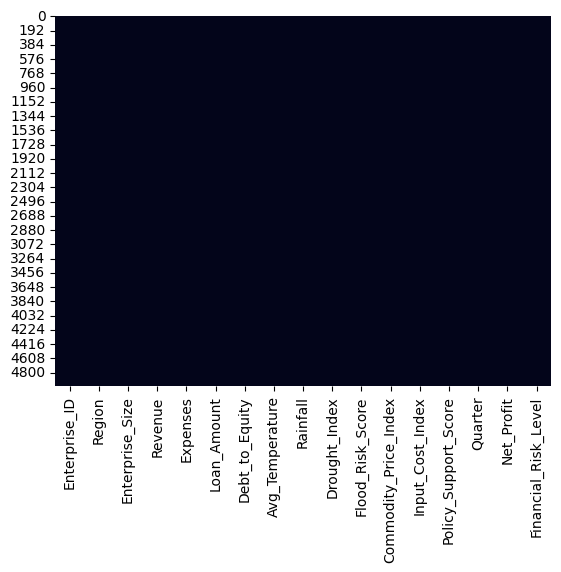

In [6]:
df.isna().sum()
sns.heatmap(df.isna(), cbar=False)


Conclusion: The dataset contains no missing values across all 4981 observations and 17 variables.


We are now going to verify if there is duplicates and drop them if there is

In [7]:
df_v1 = df.copy()

df_v1.duplicated().sum()
df_v1 = df_v1.drop_duplicates()

We are now going to do a column by column analyse.

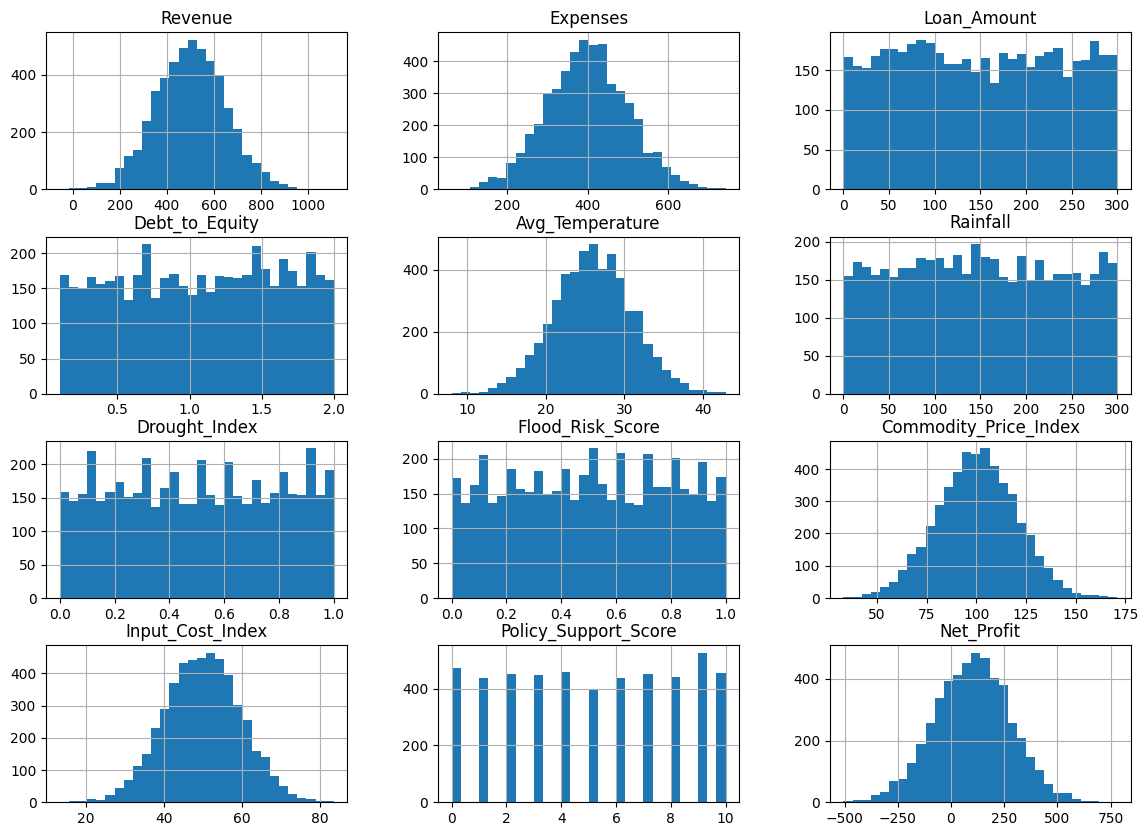

<Axes: >

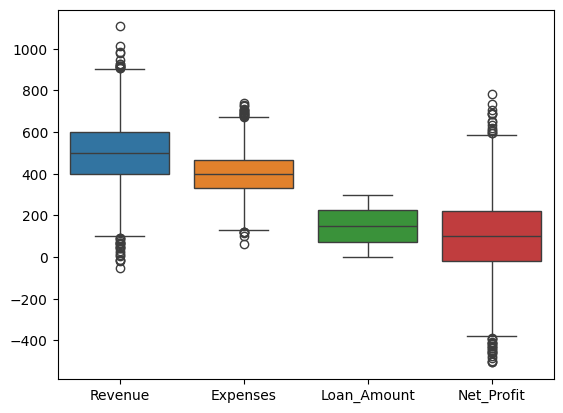

In [8]:
df_v1.hist(bins=30, figsize=(14,10)) #categoric
plt.show()

sns.boxplot(data=df_v1[['Revenue','Expenses','Loan_Amount','Net_Profit']])

In [9]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Enterprise_ID          4981 non-null   object 
 1   Region                 4981 non-null   object 
 2   Enterprise_Size        4981 non-null   object 
 3   Revenue                4981 non-null   float64
 4   Expenses               4981 non-null   float64
 5   Loan_Amount            4981 non-null   float64
 6   Debt_to_Equity         4981 non-null   float64
 7   Avg_Temperature        4981 non-null   float64
 8   Rainfall               4981 non-null   float64
 9   Drought_Index          4981 non-null   float64
 10  Flood_Risk_Score       4981 non-null   float64
 11  Commodity_Price_Index  4981 non-null   float64
 12  Input_Cost_Index       4981 non-null   float64
 13  Policy_Support_Score   4981 non-null   int64  
 14  Quarter                4981 non-null   object 
 15  Net_

<Axes: xlabel='Region'>

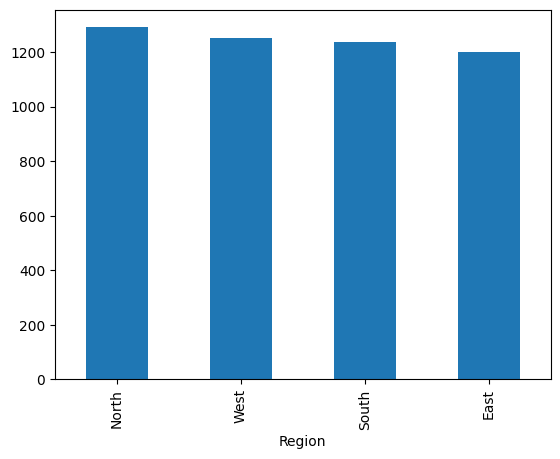

In [10]:
df_v1['Region'].value_counts().plot(kind='bar') #numeric

<Axes: ylabel='count'>

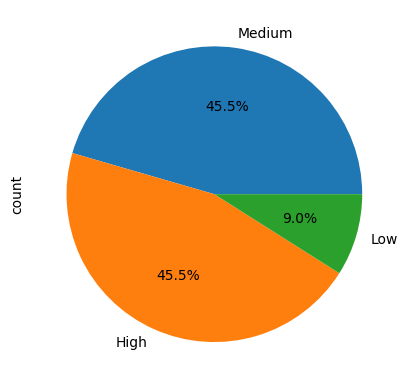

In [11]:
df_v1['Financial_Risk_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')

All good: analyse will in the report

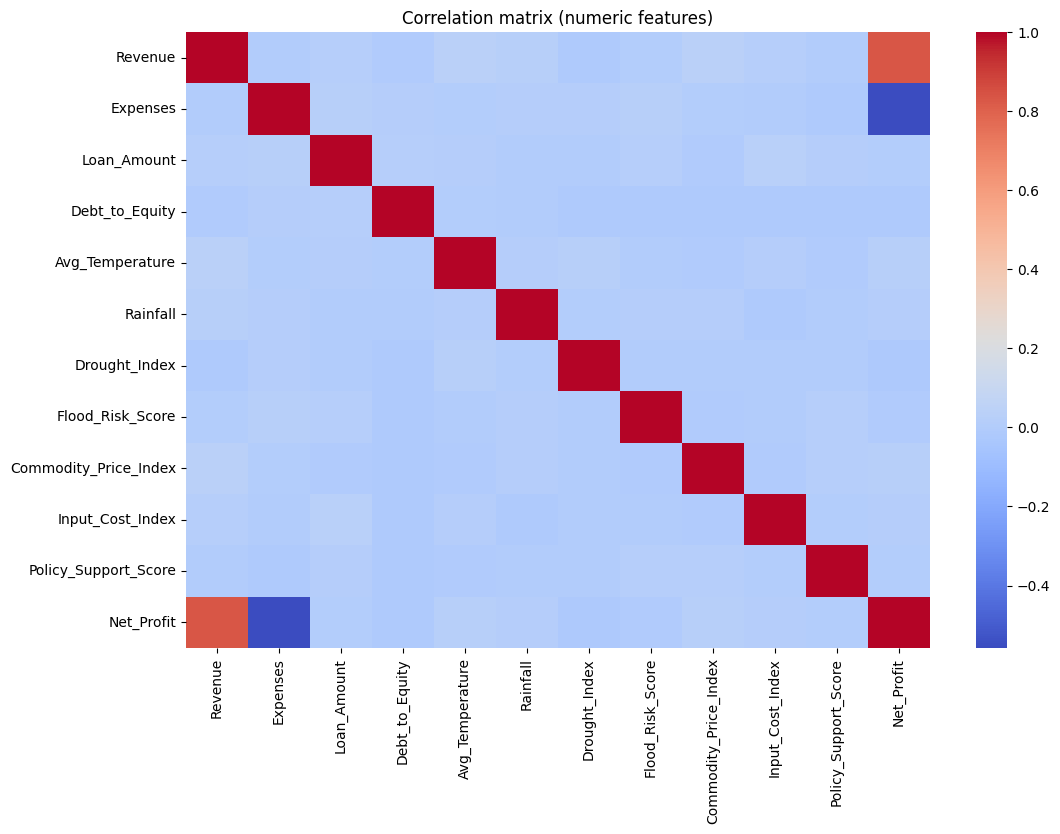

In [12]:
#multivaried analysis
num_df = df_v1.select_dtypes(include=['float64', 'int64']) #we only took numerical values

plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation matrix (numeric features)")
plt.show()


Great news for our model because low linear correlations suggest that climate impacts may involve non-linear or interaction effects that cannot be captured by a simple linear model -> A deeper modeling approach (ML classification/regression + scenario simulation) is required to uncover hidden patterns.

<Axes: xlabel='Avg_Temperature', ylabel='Net_Profit'>

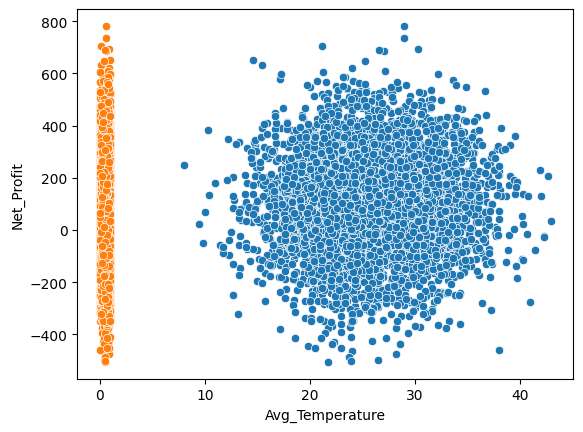

In [13]:
sns.scatterplot(x="Avg_Temperature", y="Net_Profit", data=df_v1)
sns.scatterplot(x="Drought_Index", y="Net_Profit", data=df_v1)

There is no discernible linear trend in the scatterplot of average temperature and net profit, which displays a completely dispersed cloud of points.
 The correlation matrix's weak correlation (≈ 0.02) is visually confirmed by this.
 Profit fluctuations cannot be directly explained by temperature alone, indicating that climate impacts may function through more intricate, non-linear mechanisms or interactions with other variables.

<Axes: xlabel='Net_Profit'>

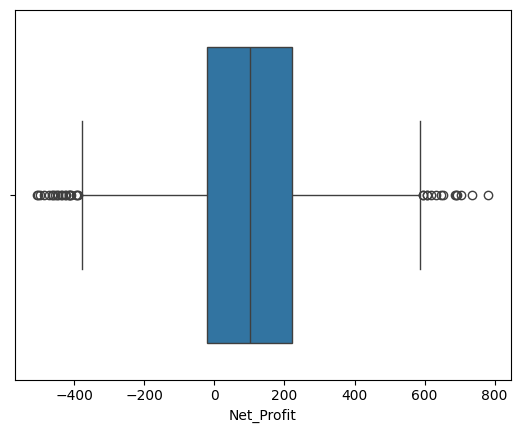

In [14]:
#outliers
sns.boxplot(x=df_v1["Net_Profit"])

Probably :
des années catastrophiques (sécheresse, inondation, prix bas)
des années exceptionnelles (prix élevés, rendement fort)
des entreprises très petites ou très grandes

It doesn't destroy our analyse

Best solution : scaler les variables to handle outliers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Revenue','Expenses','Loan_Amount','Net_Profit']])


In [15]:
df_v1['Profit_Margin'] = df_v1['Net_Profit'] / df_v1['Revenue']
df_v1['Cost_Ratio'] = df_v1['Expenses'] / df_v1['Revenue']
df_v1['Debt_Ratio'] = df_v1['Loan_Amount'] / df_v1['Revenue']

df_v1['Climate_Stress'] = (
    df_v1['Drought_Index'] * 0.4 +
    df_v1['Flood_Risk_Score'] * 0.4 +
    (df_v1['Avg_Temperature'] - df_v1['Avg_Temperature'].mean()) / df_v1['Avg_Temperature'].std() * 0.2
)

In [16]:
# 1. Remove Entreprise_ID -> doesn't matter
if "Enterprise_ID" in df_v1.columns:
    df_v1 = df_v1.drop("Enterprise_ID", axis=1)

# 2. One-hot encoding for categorical variables
categorical_cols = ['Region', 'Enterprise_Size', 'Quarter']
# it is necessary to drop the first variable, because this reduces correlations between dummy variables.
# this is why, for example, there is no "Quarter_Q1" variable
df_v1 = pd.get_dummies(df_v1, columns=categorical_cols, drop_first=True)

# 3. Separate features and target
y = df_v1['Financial_Risk_Level']
X = df_v1.drop('Financial_Risk_Level', axis=1)

# 4. Scaling numeric features
from sklearn.preprocessing import StandardScaler
num_cols = X.select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Final cleaned dataset
X_cleaned = X
y_cleaned = y


In [17]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Revenue                 4981 non-null   float64
 1   Expenses                4981 non-null   float64
 2   Loan_Amount             4981 non-null   float64
 3   Debt_to_Equity          4981 non-null   float64
 4   Avg_Temperature         4981 non-null   float64
 5   Rainfall                4981 non-null   float64
 6   Drought_Index           4981 non-null   float64
 7   Flood_Risk_Score        4981 non-null   float64
 8   Commodity_Price_Index   4981 non-null   float64
 9   Input_Cost_Index        4981 non-null   float64
 10  Policy_Support_Score    4981 non-null   int64  
 11  Net_Profit              4981 non-null   float64
 12  Financial_Risk_Level    4981 non-null   object 
 13  Profit_Margin           4981 non-null   float64
 14  Cost_Ratio              4981 non-null   

Create some features to help the model to run better

In [18]:
df_cleaned = pd.concat([X_cleaned, y_cleaned], axis=1)
df_cleaned.to_csv("data/data_cleaned.csv", index=False)

## Pipeline

### Feature Engineering

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Revenue                 4981 non-null   float64
 1   Expenses                4981 non-null   float64
 2   Loan_Amount             4981 non-null   float64
 3   Debt_to_Equity          4981 non-null   float64
 4   Avg_Temperature         4981 non-null   float64
 5   Rainfall                4981 non-null   float64
 6   Drought_Index           4981 non-null   float64
 7   Flood_Risk_Score        4981 non-null   float64
 8   Commodity_Price_Index   4981 non-null   float64
 9   Input_Cost_Index        4981 non-null   float64
 10  Policy_Support_Score    4981 non-null   float64
 11  Net_Profit              4981 non-null   float64
 12  Profit_Margin           4981 non-null   float64
 13  Cost_Ratio              4981 non-null   float64
 14  Debt_Ratio              4981 non-null   

### Emissions Proxy
Working on the emissions proxy. This is a difficult variable to build and verify, which is why I will try several different versions of it and compare them.

In all cases, this will be an exposure proxy, a value proportional to emissions footprint. It is useful, because it allows us to rank assets for stranded-ness without having to rely on actual CO2 emission data.

In [20]:
def zscore(s: pd.Series) -> pd.Series:
    return (s - s.mean()) / (s.std(ddof=0) + 1e-9)

def build_emissions_proxy_v1(df: pd.DataFrame,
                          scale_col="Expenses",          # or "Revenue"
                          input_cost_col="Input_Cost_Index",
                          climate_stress_col="Climate_Stress",
                          debt_col="Debt_to_Equity",     # or "Debt_Ratio" if you engineered it
                          weights=(0.4, 0.2, 0.3, 0.1),
                          use_log_scale=True):
    w_scale, w_input, w_climate, w_debt = weights

    scale = df[scale_col].copy()
    if use_log_scale:
        # log reduces domination by very large farms
        scale = np.log1p(scale.clip(lower=0))

    emissions_proxy = (
        w_scale   * zscore(scale) +
        w_input   * zscore(df[input_cost_col]) +
        w_climate * zscore(df[climate_stress_col]) +
        w_debt    * zscore(df[debt_col])
    )

    return emissions_proxy

# usage:
# df["Emissions_Proxy"] = build_emissions_proxy(df)


In [21]:
# this one differs, because the proxy is scaled off of revenue instead of expenses.
def build_emissions_proxy_v2(df: pd.DataFrame,
                          scale_col="Revenue",    
                          input_cost_col="Input_Cost_Index",
                          climate_stress_col="Climate_Stress",
                          debt_col="Debt_to_Equity",     # or "Debt_Ratio" if you engineered it
                          weights=(0.4, 0.2, 0.3, 0.1),
                          use_log_scale=True):
    w_scale, w_input, w_climate, w_debt = weights

    scale = df[scale_col].copy()
    if use_log_scale:
        # log reduces domination by very large farms
        scale = np.log1p(scale.clip(lower=0))

    emissions_proxy = (
        w_scale   * zscore(scale) +
        w_input   * zscore(df[input_cost_col]) +
        w_climate * zscore(df[climate_stress_col]) +
        w_debt    * zscore(df[debt_col])
    )

    return emissions_proxy

# usage:
# df["Emissions_Proxy"] = build_emissions_proxy(df)


In [22]:
# this emissions proxy is same as the original one, except its weights are all equal. How would that change 
# the rankings?
def build_emissions_proxy_v3(df: pd.DataFrame,
                          scale_col="Expenses",
                          input_cost_col="Input_Cost_Index",
                          climate_stress_col="Climate_Stress",
                          debt_col="Debt_to_Equity",
                          weights=(0.25, 0.25, 0.25, 0.25),
                          use_log_scale=True):
    w_scale, w_input, w_climate, w_debt = weights

    scale = df[scale_col].copy()
    if use_log_scale:
        # log reduces domination by very large farms
        scale = np.log1p(scale.clip(lower=0))

    emissions_proxy = (
        w_scale   * zscore(scale) +
        w_input   * zscore(df[input_cost_col]) +
        w_climate * zscore(df[climate_stress_col]) +
        w_debt    * zscore(df[debt_col])
    )

    return emissions_proxy

# usage:
# df["Emissions_Proxy"] = build_emissions_proxy(df)


In [23]:
# this emissions proxy is same as the original one, except its weights are all equal. How would that change 
# the rankings?
def build_emissions_proxy_v4(df: pd.DataFrame,
                          scale_col="Revenue",
                          input_cost_col="Input_Cost_Index",
                          climate_stress_col="Climate_Stress",
                          debt_col="Debt_to_Equity",
                          weights=(0.25, 0.25, 0.25, 0.25),
                          use_log_scale=True):
    w_scale, w_input, w_climate, w_debt = weights

    scale = df[scale_col].copy()
    if use_log_scale:
        # log reduces domination by very large farms
        scale = np.log1p(scale.clip(lower=0))

    emissions_proxy = (
        w_scale   * zscore(scale) +
        w_input   * zscore(df[input_cost_col]) +
        w_climate * zscore(df[climate_stress_col]) +
        w_debt    * zscore(df[debt_col])
    )

    return emissions_proxy

# usage:
# df["Emissions_Proxy"] = build_emissions_proxy(df)


In [24]:
df_cleaned["Emissions_Proxy_v1"] = build_emissions_proxy_v1(df_cleaned)
df_cleaned["Emissions_Proxy_v2"] = build_emissions_proxy_v2(df_cleaned)
df_cleaned["Emissions_Proxy_v3"] = build_emissions_proxy_v3(df_cleaned)
df_cleaned["Emissions_Proxy_v4"] = build_emissions_proxy_v4(df_cleaned)


Now, I compare the differences in rankings of all three emission proxies. If the difference is minimal, then the emission proxy's evaluation is stable, and it can be used for the next steps. Otherwise, there is uncertainty, as the methods for calculating emission proxy are not robust.

The criteria for acceptance of proxy:
+ Mean absolute difference between proxies < 0.1
+ Overlap between highest-risk assets(top 10% rankings) > 75%

In [25]:
def high_risk_overlap_evaluator(df, proxy_1, proxy_2, q=0.9):
    """
    Analyses similarity between rankings of highest-risk assets
    q - quantile of emission proxy(q=0.9 means top 10%)
    proxy_1, proxy_2 - emission proxy calculations being compared
    """
    top_A = df[proxy_1] >= df[proxy_1].quantile(q)
    top_B = df[proxy_2] >= df[proxy_2].quantile(q)
    overlap = (top_A & top_B).sum() / top_A.sum()
    return overlap

def mad_evaluator(df, proxy_1, proxy_2):
    mad_value = np.mean(abs(df[proxy_2]-df[proxy_1]))
    return mad_value

def basic_proxy_comparer(df, proxy_1, proxy_2):
    print("Mean absolute difference:", mad_evaluator(df, proxy_1, proxy_2))
    print("Overlap between highest-risk assets rankings:", high_risk_overlap_evaluator(df, proxy_1, proxy_2))

In [26]:
basic_proxy_comparer(df_cleaned, "Emissions_Proxy_v1", "Emissions_Proxy_v2")

Mean absolute difference: 0.41012810190931664
Overlap between highest-risk assets rankings: 0.23246492985971945


In [27]:
basic_proxy_comparer(df_cleaned, "Emissions_Proxy_v1", "Emissions_Proxy_v3")

Mean absolute difference: 0.18176740061825222
Overlap between highest-risk assets rankings: 0.7034068136272545


In [28]:
basic_proxy_comparer(df_cleaned, "Emissions_Proxy_v1", "Emissions_Proxy_v4")

Mean absolute difference: 0.3920844207132099
Overlap between highest-risk assets rankings: 0.27655310621242485


In [29]:
basic_proxy_comparer(df_cleaned, "Emissions_Proxy_v2", "Emissions_Proxy_v3")

Mean absolute difference: 0.3954663553182225
Overlap between highest-risk assets rankings: 0.28256513026052105


In [30]:
basic_proxy_comparer(df_cleaned, "Emissions_Proxy_v2", "Emissions_Proxy_v4")

Mean absolute difference: 0.18219910209781803
Overlap between highest-risk assets rankings: 0.7134268537074149


In [31]:
basic_proxy_comparer(df_cleaned, "Emissions_Proxy_v3", "Emissions_Proxy_v4")

Mean absolute difference: 0.2563300636933229
Overlap between highest-risk assets rankings: 0.4529058116232465


In [32]:
df_cleaned["Emissions_Proxy_v3"].head()

0    1.499632
1   -0.049387
2    0.100891
3    0.353325
4   -0.490968
Name: Emissions_Proxy_v3, dtype: float64

In [33]:
df_cleaned["Emissions_Proxy_v1"].head()

0    2.087305
1   -0.078549
2    0.293105
3    0.103929
4   -0.718717
Name: Emissions_Proxy_v1, dtype: float64

Results:

+ The emissions proxy is sensitive to the choice of scaling variable, but relatively robust to the choice of weights.
+ (add more reasons why v1 is the best version)

In [34]:
baseline_proxy = "Emissions_Proxy_v1"

### Carbon Risk Calculations

Firm-level emissions data is unavailable, so we model carbon exposure by a normalized emissions proxy. In this case, carbon prices work as scenario multipliers, yielding a relative carbon cost index rather than an absolute tax liability.

The three scenarios are:
+ Delayed transition - gradual decrease of emissions
+ Net zero 2050 - meet the climate goal of zero net CO2 emissions(net zero) by 2050
+ Divergent Net Zero

![Bar plot that shows prices for emissions($/tCO2 equivalent) for 3 different scenarios](images/ngfs_bar_plot.png "a title")

Carbon price scenarios are taken from the NGFS Phase 3 climate scenarios based on the REMIND integrated assessment model (NGFS, Phase 3).

This approach helps compare relative transition exposure across assets and scenarios.  Thus, it overcomes the lack of verifiable assumptions on emissions levels.

In [35]:
# Carbon price scenarios ($/tCO2 equivalent) based on the source above
carbon_price_scenarios = {
    "Delayed Transition": 10,
    "Net Zero(NZ) 2050": 110,
    "Divergent Net Zero": 300
}


Now, we will add three functions, which will add several important metrics related to carbon risk for each of the three scenarios. These are:
+ Carbon Cost Index(relative, not monetary)
+ Adjusted Profit
+ Carbon Risk Score

In [36]:
# this function modifies the dataframe.
# calculates the carbon cost for different scenarios and then normalizes it
# this is because the original emission proxy is a z-score
def carbon_cost_calculator(scenario_dict, df, proxy_column):
    for scenario, price in scenario_dict.items():
        df[f"Carbon_Cost_{scenario}"] = (
            df[proxy_column] * price)

    for scenario in scenario_dict:
        col = f"Carbon_Cost_{scenario}"
        df[col] = df[col] - df[col].min()



In [37]:
def adj_profit_scenario(scenario_dict, df):    
    for scenario in scenario_dict:
        df[f"Adj_Profit_{scenario}"] = (
            df["Net_Profit"] - df[f"Carbon_Cost_{scenario}"]
        )


In [38]:
def carbon_risk_score(scenario_dict, df):    
    for scenario in scenario_dict:
        df[f"Carbon_Risk_Score_{scenario}"] = (
            df[f"Carbon_Cost_{scenario}"] - df["Net_Profit"]
        )


In [39]:
carbon_cost_calculator(carbon_price_scenarios, df_cleaned, baseline_proxy)
adj_profit_scenario(carbon_price_scenarios, df_cleaned)
carbon_risk_score(carbon_price_scenarios, df_cleaned)

In [40]:
df_cleaned.head()

,Revenue,Expenses,Loan_Amount,Debt_to_Equity,Avg_Temperature,Rainfall,Drought_Index,Flood_Risk_Score,Commodity_Price_Index,Input_Cost_Index,...,Emissions_Proxy_v4,Carbon_Cost_Delayed Transition,Carbon_Cost_Net Zero(NZ) 2050,Carbon_Cost_Divergent Net Zero,Adj_Profit_Delayed Transition,Adj_Profit_Net Zero(NZ) 2050,Adj_Profit_Divergent Net Zero,Carbon_Risk_Score_Delayed Transition,Carbon_Risk_Score_Net Zero(NZ) 2050,Carbon_Risk_Score_Divergent Net Zero
0,0.071668,2.206394,-0.605956,-0.613667,2.847886,-0.246579,1.156068,0.967805,2.048723,0.914219,...,0.715760,37.571978,413.291757,1127.159337,-38.744181,-414.463960,-1128.331541,38.744181,414.463960,1128.331541
1,-0.140900,0.291911,1.032866,0.350498,-0.480302,1.247197,-0.287177,1.176612,-0.214911,-0.539166,...,-0.234191,15.913435,175.047784,477.403048,-16.193298,-175.327647,-477.682910,16.193298,175.327647,477.682910
2,-1.494521,0.511156,-0.550036,-0.977503,-0.961486,0.425330,1.121705,1.246215,1.257743,0.651177,...,-0.195799,19.629977,215.929747,588.899309,-21.155376,-217.455146,-590.424708,21.155376,217.455146,590.424708
3,0.110707,-2.537540,-0.835964,0.623374,-0.339957,-0.831302,1.465334,-0.076233,-0.586056,1.191591,...,0.426837,17.738218,195.120397,532.146538,-16.229837,-193.612017,-530.638158,16.229837,193.612017,530.638158
4,-0.656725,0.260704,-0.952176,0.987210,-1.522868,-0.432574,-1.661695,-0.354643,-1.023778,-0.779691,...,-0.658318,9.511758,104.629343,285.352753,-10.202199,-105.319783,-286.043193,10.202199,105.319783,286.043193


## Models

Our goal is to predict stranded agricultural assets. For that, there are two separate prediction tasks, which require two different models:
+ Future Revenue Prediction - Regularized Linear Regression
    + Simple and captures the linear relation between the potential CO2 emissions and risk rating of an agricultural asset
+ Future Emissions Proxy Prediction - Linear Index Evolution Model
    + Simple and methodologically conservative prediction method. This is useful for when precise emission data is unavailable

In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Revenue                               4981 non-null   float64
 1   Expenses                              4981 non-null   float64
 2   Loan_Amount                           4981 non-null   float64
 3   Debt_to_Equity                        4981 non-null   float64
 4   Avg_Temperature                       4981 non-null   float64
 5   Rainfall                              4981 non-null   float64
 6   Drought_Index                         4981 non-null   float64
 7   Flood_Risk_Score                      4981 non-null   float64
 8   Commodity_Price_Index                 4981 non-null   float64
 9   Input_Cost_Index                      4981 non-null   float64
 10  Policy_Support_Score                  4981 non-null   float64
 11  Net_Profit       

### Model 1: Future Revenue Prediction - Regularized Linear Regression

Profit is explained by financial structure, market conditions, and climate stress. We estimate it using a regularized linear model (Ridge), because it keeps coefficients stable and interpretable

In [42]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# ---- 1) Choose target and feature set
df_w1 = df_cleaned.copy()

y = df_w1["Net_Profit"]

# Exclude: target, labels, and any feature that directly contains target information
exclude = {
    "Net_Profit",
    "Financial_Risk_Level",
    "Profit_Margin",  # contains Net_Profit / Revenue -> leakage if predicting Net_Profit
}

X = df_w1.drop(columns=[c for c in exclude if c in df_w1.columns])

# Convert bool dummies to int (optional but helps interpret coefficients)
bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

# ---- 2) Pipeline: (optional scaler) + ridge
# Note: your numeric columns are already scaled, but this keeps things robust and reportable.
pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("model", Ridge())
])

# ---- 3) Cross-validate alpha
alphas = np.logspace(-3, 3, 20)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scorer = make_scorer(lambda yt, yp: np.sqrt(mean_squared_error(yt, yp)),
                          greater_is_better=False)

best_alpha, best_score = None, -np.inf
for a in alphas:
    pipe.set_params(model__alpha=a)
    scores = cross_val_score(pipe, X, y, cv=cv, scoring=rmse_scorer)
    mean_score = scores.mean()  # negative RMSE; higher is better
    if mean_score > best_score:
        best_score, best_alpha = mean_score, a

# ---- 4) Fit final model and report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe.set_params(model__alpha=best_alpha)
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("D1-A Ridge (Net_Profit)")
print("Best alpha:", best_alpha)
print("Test RMSE:", rmse)
print("Test R^2:", r2)


D1-A Ridge (Net_Profit)
Best alpha: 0.001
Test RMSE: 6.123360401600498e-07
Test R^2: 0.9999999999996039


Very strong prediction of the future profits of assets.

In [43]:
df_cleaned["Pred_Net_Profit"] = pipe.predict(X)

### Model 2: Future Emissions Proxy Prediction - Linear Index Evolution Model

Emissions exposure proxy is explained by climate stress + input intensity + financial pressure + size/region. We estimate it using an interpretable linear model that considers all the aforementioned factors.

In [44]:
from sklearn.linear_model import Ridge

df = df_cleaned.copy()

proxy_col = "Emissions_Proxy_v1"
y2 = df[proxy_col]

# Use *drivers* rather than derived ratio features to keep it meaningful.
# Start with these core drivers (all exist in your df) :contentReference[oaicite:2]{index=2}
core_features = [
    "Expenses",
    "Input_Cost_Index",
    "Climate_Stress",
    "Debt_to_Equity",
    "Loan_Amount",
    "Commodity_Price_Index",
    "Policy_Support_Score",
    "Avg_Temperature",
    "Rainfall",
    "Drought_Index",
    "Flood_Risk_Score",
]

dummy_features = [c for c in df.columns if c.startswith("Region_") or c.startswith("Enterprise_Size_") or c.startswith("Quarter_")]
features = [c for c in core_features if c in df.columns] + dummy_features

X2 = df[features].copy()
bool_cols = X2.select_dtypes(include=["bool"]).columns
X2[bool_cols] = X2[bool_cols].astype(int)

pipe2 = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

# CV alpha
alphas = np.logspace(-3, 3, 20)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

best_alpha, best_score = None, -np.inf
for a in alphas:
    pipe2.set_params(model__alpha=a)
    scores = cross_val_score(pipe2, X2, y2, cv=cv, scoring=rmse_scorer)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score, best_alpha = mean_score, a

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
pipe2.set_params(model__alpha=best_alpha)
pipe2.fit(X2_train, y2_train)

pred2 = pipe2.predict(X2_test)
rmse2 = np.sqrt(mean_squared_error(y2_test, pred2))
r2_2 = r2_score(y2_test, pred2)

print("D2-A Ridge (Emissions_Proxy_v1)")
print("Best alpha:", best_alpha)
print("Test RMSE:", rmse2)
print("Test R^2:", r2_2)


D2-A Ridge (Emissions_Proxy_v1)
Best alpha: 2.976351441631316
Test RMSE: 0.1881248759721683
Test R^2: 0.8941232093622896


Strong prediction of the emissions proxy for the future.

In [45]:
df_cleaned["Pred_Emissions_Proxy"] = pipe2.predict(X2)


## Output Generation

This part is the culmination of the pipeline, as it gives the results of the code before. 

Proxies are relative values, which are calculated by using every relevant variable. For example, an asset with higher "Future Emissions" will emit more CO2 in the future than other assets. 

This code also includes three scenarios for different CO2 prices.

### 1. Future Emissions

The predicted emissions proxy represents the relative future emissions exposure for each asset, calculated by Model 2.


Future Emissions Proxy Summary:
count    4981.000000
mean        0.000005
std         0.515589
min        -2.001431
25%        -0.354874
50%        -0.003092
75%         0.346594
max         1.841231
Name: Future_Emissions_Proxy, dtype: float64

Distribution across scenarios:
Mean: 0.0000
Std: 0.5156
Min: -2.0014
Max: 1.8412


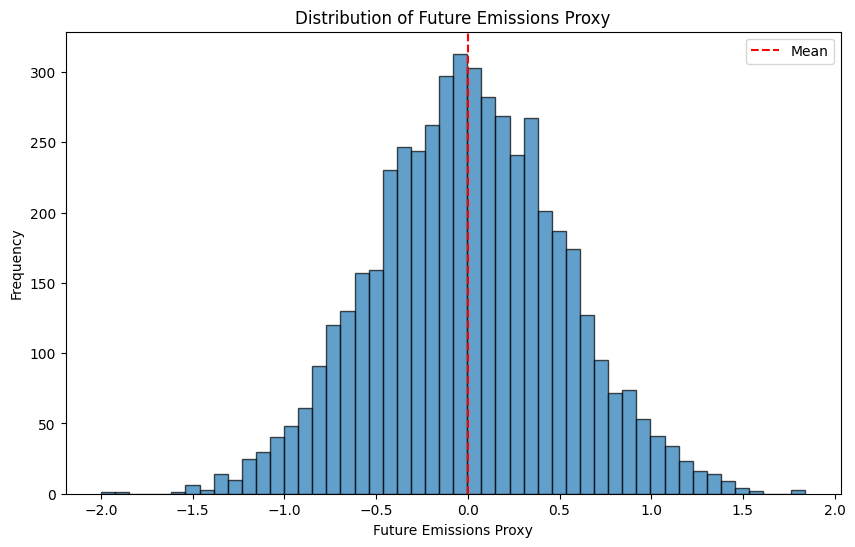

In [46]:
# Future emissions proxy (already calculated by Model 2)
df_cleaned["Future_Emissions_Proxy"] = df_cleaned["Pred_Emissions_Proxy"]

# Summary statistics of future emissions proxy
print("Future Emissions Proxy Summary:")
print(df_cleaned["Future_Emissions_Proxy"].describe())
print("\nDistribution across scenarios:")
print(f"Mean: {df_cleaned['Future_Emissions_Proxy'].mean():.4f}")
print(f"Std: {df_cleaned['Future_Emissions_Proxy'].std():.4f}")
print(f"Min: {df_cleaned['Future_Emissions_Proxy'].min():.4f}")
print(f"Max: {df_cleaned['Future_Emissions_Proxy'].max():.4f}")

# Visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned["Future_Emissions_Proxy"], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Future Emissions Proxy")
plt.ylabel("Frequency")
plt.title("Distribution of Future Emissions Proxy")
plt.axvline(df_cleaned["Future_Emissions_Proxy"].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()


### 2. Environmental Risk

Environmental risk represents the relative carbon liability faced by an asset depending on different transition policies. It is calculated as: `Environmental Risk(Proxy) = Future Emissions(Proxy) × Carbon Price(scenario $)`


Environmental Risk Summary by Scenario:

Delayed Transition:
  Mean: 20.0144
  Std: 5.1559
  Min: 0.0000
  Max: 38.4266

Net Zero(NZ) 2050:
  Mean: 220.1579
  Std: 56.7148
  Min: 0.0000
  Max: 422.6928

Divergent Net Zero:
  Mean: 600.4308
  Std: 154.6766
  Min: 0.0000
  Max: 1152.7986


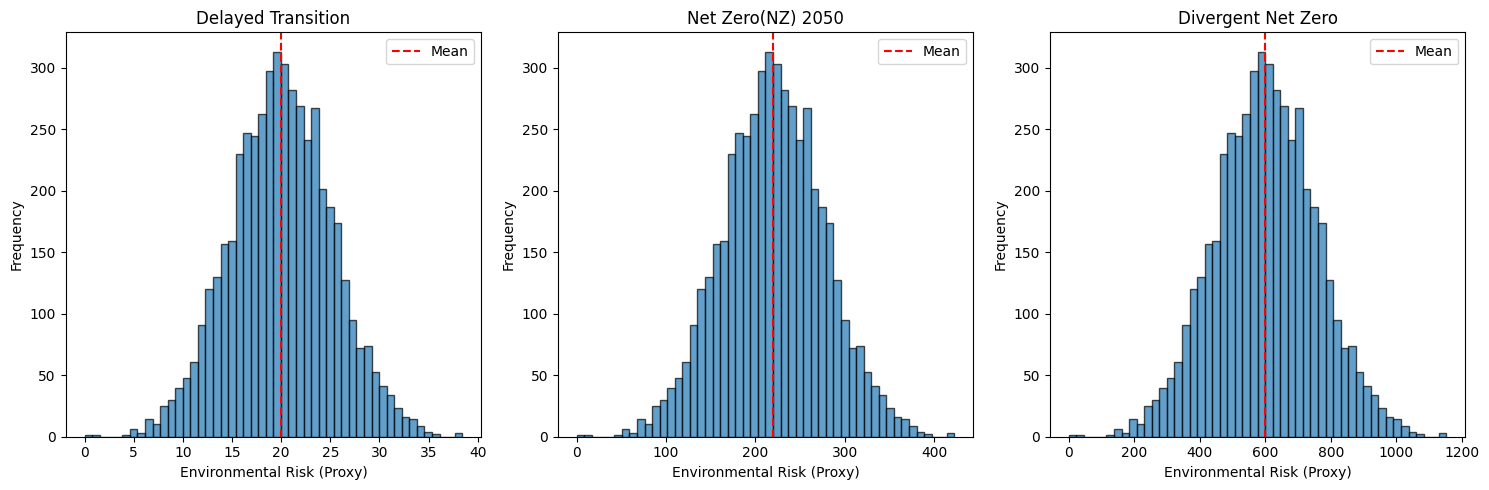

In [47]:
# Calculate Environmental Risk for each scenario using predicted emissions proxy
for scenario, price in carbon_price_scenarios.items():
    df_cleaned[f"Environmental_Risk_{scenario}"] = (
        df_cleaned["Future_Emissions_Proxy"] * price
    )

# Normalize environmental risk (relative values)
for scenario in carbon_price_scenarios:
    col = f"Environmental_Risk_{scenario}"
    df_cleaned[col] = df_cleaned[col] - df_cleaned[col].min()

# Summary of environmental risk across scenarios
print("Environmental Risk Summary by Scenario:")
for scenario in carbon_price_scenarios:
    col = f"Environmental_Risk_{scenario}"
    print(f"\n{scenario}:")
    print(f"  Mean: {df_cleaned[col].mean():.4f}")
    print(f"  Std: {df_cleaned[col].std():.4f}")
    print(f"  Min: {df_cleaned[col].min():.4f}")
    print(f"  Max: {df_cleaned[col].max():.4f}")

# Visualize environmental risk across scenarios
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, scenario in enumerate(carbon_price_scenarios):
    col = f"Environmental_Risk_{scenario}"
    axes[idx].hist(df_cleaned[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel("Environmental Risk (Proxy)")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"{scenario}")
    axes[idx].axvline(df_cleaned[col].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].legend()
plt.tight_layout()
plt.show()


### 3. Discounted Future Revenues

We project future revenues over time using the predicted net profit model. For simplicity, we assume revenue grows at a constant rate based on historical patterns.


Future Revenue Projections Summary:
Predicted Future Revenue (Year 1) - Mean: 0.01
Discounted Future Revenues (5 years, 5% discount) - Mean: 0.04


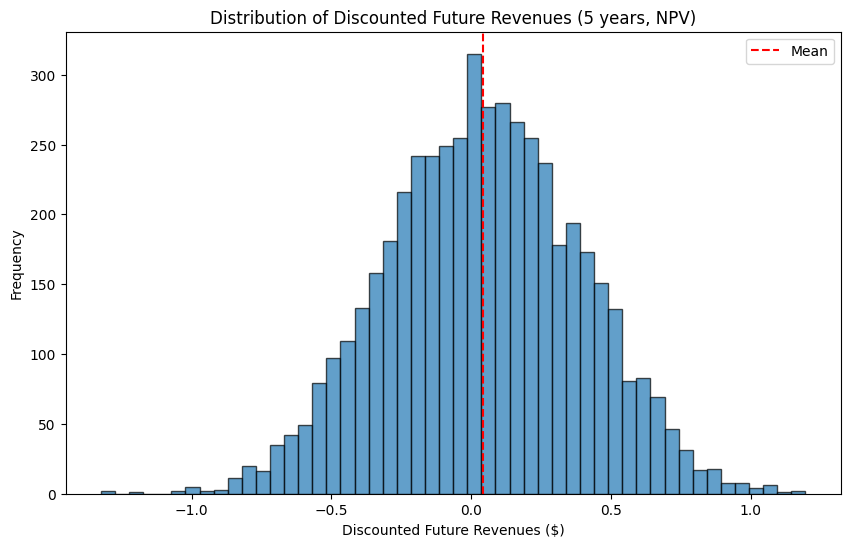

In [48]:
# Calculate predicted future revenue based on predicted net profit
# Using the relationship: Revenue = Net_Profit / Profit_Margin (if profit margin is stable)
# Or we can use a simpler approach: predict revenue directly from features

# Approach: Use predicted net profit and historical profit margin to estimate future revenue
# For assets with positive profit margin, we can estimate revenue
# For others, we use a regression approach

# Create a revenue prediction model (similar to net profit model)
from sklearn.linear_model import Ridge

y_revenue = df_cleaned["Revenue"]
X_revenue = df_cleaned.drop(columns=["Revenue", "Net_Profit", "Financial_Risk_Level", 
                                     "Profit_Margin", "Cost_Ratio", "Debt_Ratio"] + 
                           [col for col in df_cleaned.columns if col.startswith("Carbon_") or 
                            col.startswith("Adj_Profit_") or col.startswith("Emissions_Proxy") or
                            col.startswith("Pred_") or col.startswith("Environmental_Risk_")])

bool_cols = X_revenue.select_dtypes(include=["bool"]).columns
X_revenue[bool_cols] = X_revenue[bool_cols].astype(int)

pipe_revenue = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=best_alpha))
])

X_rev_train, X_rev_test, y_rev_train, y_rev_test = train_test_split(
    X_revenue, y_revenue, test_size=0.2, random_state=42
)
pipe_revenue.fit(X_rev_train, y_rev_train)

df_cleaned["Pred_Future_Revenue"] = pipe_revenue.predict(X_revenue)

# Calculate revenue over time (assuming constant growth rate)
# For simplicity, we'll project 5 years ahead with a conservative growth assumption
years = 5
growth_rate = 0.02  # 2% annual growth (conservative estimate)

df_cleaned["Revenue_Year_1"] = df_cleaned["Pred_Future_Revenue"]
for year in range(2, years + 1):
    df_cleaned[f"Revenue_Year_{year}"] = df_cleaned[f"Revenue_Year_{year-1}"] * (1 + growth_rate)

# Calculate discounted future revenues (NPV with discount rate)
discount_rate = 0.05  # 5% discount rate
df_cleaned["Discounted_Future_Revenues"] = sum(
    df_cleaned[f"Revenue_Year_{year}"] / ((1 + discount_rate) ** year)
    for year in range(1, years + 1)
)

print("Future Revenue Projections Summary:")
print(f"Predicted Future Revenue (Year 1) - Mean: {df_cleaned['Pred_Future_Revenue'].mean():.2f}")
print(f"Discounted Future Revenues (5 years, 5% discount) - Mean: {df_cleaned['Discounted_Future_Revenues'].mean():.2f}")

# Visualize revenue projections
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned["Discounted_Future_Revenues"], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Discounted Future Revenues ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Discounted Future Revenues (5 years, NPV)")
plt.axvline(df_cleaned["Discounted_Future_Revenues"].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()


### 4. Future Profit

Future profit accounts for carbon costs under different scenarios: `Future Profit(proxy) = Future Revenue($) − Carbon Cost(scenario proxy)`


Future Profit Summary by Scenario:

Delayed Transition:
  Mean: -20.01
  Std: 5.14
  Min: -38.34
  Max: -0.02
  Negative Profit Count: 4981 (100.00%)

Net Zero(NZ) 2050:
  Mean: -220.15
  Std: 56.70
  Min: -422.60
  Max: -0.02
  Negative Profit Count: 4981 (100.00%)

Divergent Net Zero:
  Mean: -600.42
  Std: 154.66
  Min: -1152.70
  Max: -0.02
  Negative Profit Count: 4981 (100.00%)


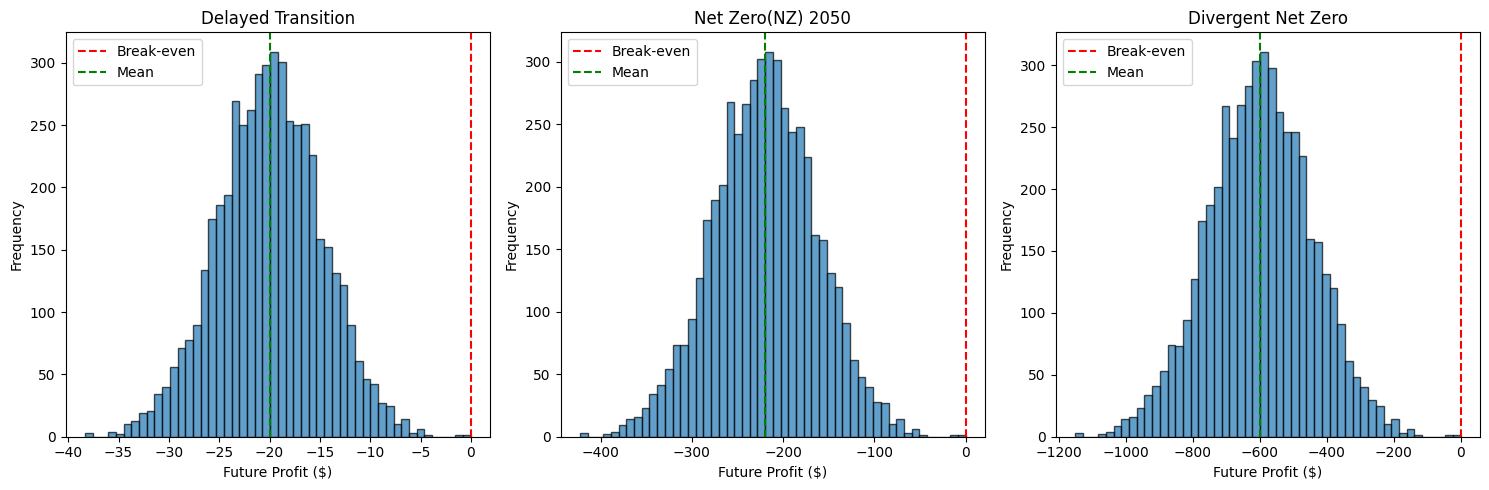

In [49]:
# Calculate future profit for each scenario
# Using predicted future revenue and carbon costs based on predicted emissions proxy

# First, recalculate carbon costs using predicted emissions proxy
for scenario, price in carbon_price_scenarios.items():
    df_cleaned[f"Carbon_Cost_Future_{scenario}"] = (
        df_cleaned["Future_Emissions_Proxy"] * price
    )
    # Normalize
    df_cleaned[f"Carbon_Cost_Future_{scenario}"] = (
        df_cleaned[f"Carbon_Cost_Future_{scenario}"] - 
        df_cleaned[f"Carbon_Cost_Future_{scenario}"].min()
    )

# Calculate future profit for each scenario
for scenario in carbon_price_scenarios:
    df_cleaned[f"Future_Profit_{scenario}"] = (
        df_cleaned["Pred_Future_Revenue"] - 
        df_cleaned[f"Carbon_Cost_Future_{scenario}"]
    )

# Summary statistics
print("Future Profit Summary by Scenario:")
for scenario in carbon_price_scenarios:
    col = f"Future_Profit_{scenario}"
    print(f"\n{scenario}:")
    print(f"  Mean: {df_cleaned[col].mean():.2f}")
    print(f"  Std: {df_cleaned[col].std():.2f}")
    print(f"  Min: {df_cleaned[col].min():.2f}")
    print(f"  Max: {df_cleaned[col].max():.2f}")
    print(f"  Negative Profit Count: {(df_cleaned[col] < 0).sum()} ({(df_cleaned[col] < 0).sum() / len(df_cleaned) * 100:.2f}%)")

# Visualize future profit across scenarios
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, scenario in enumerate(carbon_price_scenarios):
    col = f"Future_Profit_{scenario}"
    axes[idx].hist(df_cleaned[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel("Future Profit ($)")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"{scenario}")
    axes[idx].axvline(0, color='red', linestyle='--', label='Break-even')
    axes[idx].axvline(df_cleaned[col].mean(), color='green', linestyle='--', label='Mean')
    axes[idx].legend()
plt.tight_layout()
plt.show()


Carbon Risk Score Summary by Scenario:

Delayed Transition:
  Mean: 20.01
  Std: 5.14
  Min: 0.02
  Max: 38.34
  Stranded Assets (Risk Score > 0): 4981 (100.00%)

Net Zero(NZ) 2050:
  Mean: 220.15
  Std: 56.70
  Min: 0.02
  Max: 422.60
  Stranded Assets (Risk Score > 0): 4981 (100.00%)

Divergent Net Zero:
  Mean: 600.42
  Std: 154.66
  Min: 0.02
  Max: 1152.70
  Stranded Assets (Risk Score > 0): 4981 (100.00%)


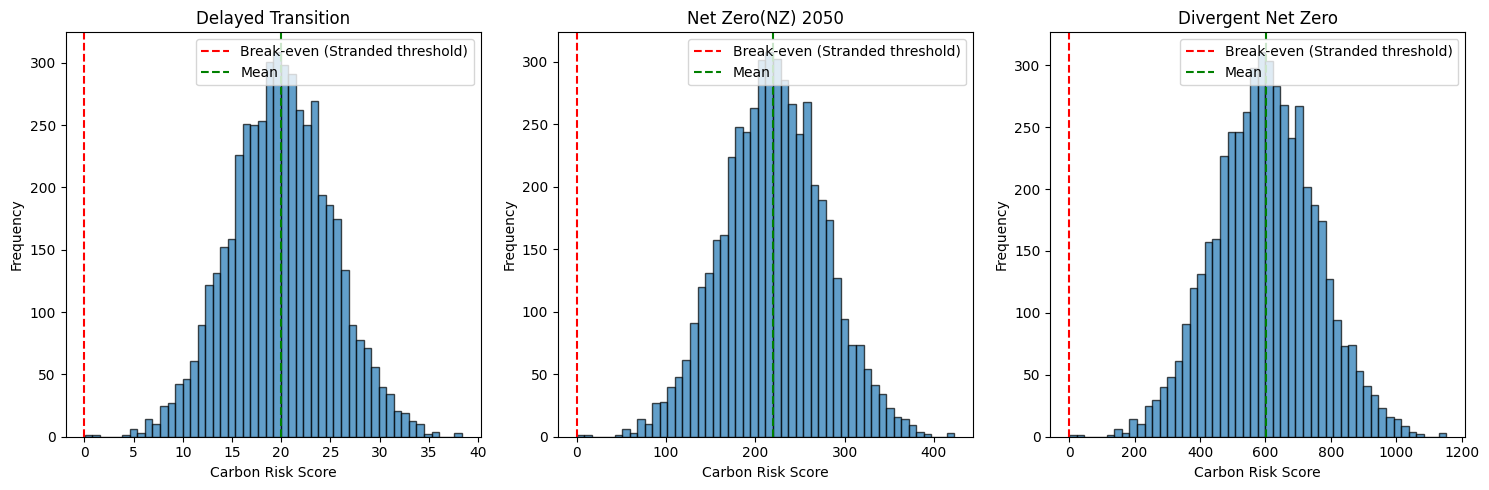

In [50]:
# Calculate carbon risk score for each scenario using predicted revenue
for scenario in carbon_price_scenarios:
    df_cleaned[f"Carbon_Risk_Score_Future_{scenario}"] = (
        df_cleaned[f"Carbon_Cost_Future_{scenario}"] - 
        df_cleaned["Pred_Future_Revenue"]
    )

# Summary statistics
print("Carbon Risk Score Summary by Scenario:")
for scenario in carbon_price_scenarios:
    col = f"Carbon_Risk_Score_Future_{scenario}"
    print(f"\n{scenario}:")
    print(f"  Mean: {df_cleaned[col].mean():.2f}")
    print(f"  Std: {df_cleaned[col].std():.2f}")
    print(f"  Min: {df_cleaned[col].min():.2f}")
    print(f"  Max: {df_cleaned[col].max():.2f}")
    # Positive risk score means carbon cost exceeds revenue (stranded)
    stranded_count = (df_cleaned[col] > 0).sum()
    print(f"  Stranded Assets (Risk Score > 0): {stranded_count} ({stranded_count / len(df_cleaned) * 100:.2f}%)")

# Visualize carbon risk scores
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, scenario in enumerate(carbon_price_scenarios):
    col = f"Carbon_Risk_Score_Future_{scenario}"
    axes[idx].hist(df_cleaned[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel("Carbon Risk Score")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"{scenario}")
    axes[idx].axvline(0, color='red', linestyle='--', label='Break-even (Stranded threshold)')
    axes[idx].axvline(df_cleaned[col].mean(), color='green', linestyle='--', label='Mean')
    axes[idx].legend()
plt.tight_layout()
plt.show()


### 6. Stranded Assets Analysis

We analyze stranded assets (those with positive carbon risk score) across different dimensions: regions, enterprise sizes, and climate profiles.


In [51]:
# Identify stranded assets (using the most severe scenario: Divergent Net Zero)
stranded_scenario = "Divergent Net Zero"
stranded_col = f"Carbon_Risk_Score_Future_{stranded_scenario}"

df_cleaned["Is_Stranded"] = df_cleaned[stranded_col] > 0

# Reconstruct original categorical variables for analysis
# Region
df_cleaned["Region"] = "East"  # default
df_cleaned.loc[df_cleaned["Region_North"] == 1, "Region"] = "North"
df_cleaned.loc[df_cleaned["Region_South"] == 1, "Region"] = "South"
df_cleaned.loc[df_cleaned["Region_West"] == 1, "Region"] = "West"

# Enterprise Size
df_cleaned["Enterprise_Size"] = "Large"  # default
df_cleaned.loc[df_cleaned["Enterprise_Size_Medium"] == 1, "Enterprise_Size"] = "Medium"
df_cleaned.loc[df_cleaned["Enterprise_Size_Small"] == 1, "Enterprise_Size"] = "Small"

# Climate profile categorization (based on Climate_Stress)
df_cleaned["Climate_Profile"] = pd.cut(
    df_cleaned["Climate_Stress"],
    bins=[-np.inf, df_cleaned["Climate_Stress"].quantile(0.33), 
          df_cleaned["Climate_Stress"].quantile(0.67), np.inf],
    labels=["Low", "Medium", "High"]
)

print(f"Total Stranded Assets: {df_cleaned['Is_Stranded'].sum()} ({df_cleaned['Is_Stranded'].sum() / len(df_cleaned) * 100:.2f}%)")
print(f"\nStranded Assets by Region:")
print(df_cleaned.groupby("Region")["Is_Stranded"].agg(['sum', 'count', lambda x: x.sum() / len(x) * 100]).round(2))
print(f"\nStranded Assets by Enterprise Size:")
print(df_cleaned.groupby("Enterprise_Size")["Is_Stranded"].agg(['sum', 'count', lambda x: x.sum() / len(x) * 100]).round(2))
print(f"\nStranded Assets by Climate Profile:")
print(df_cleaned.groupby("Climate_Profile")["Is_Stranded"].agg(['sum', 'count', lambda x: x.sum() / len(x) * 100]).round(2))


Total Stranded Assets: 4981 (100.00%)

Stranded Assets by Region:
         sum  count  <lambda_0>
Region                         
East    1201   1201       100.0
North   1291   1291       100.0
South   1236   1236       100.0
West    1253   1253       100.0

Stranded Assets by Enterprise Size:
                  sum  count  <lambda_0>
Enterprise_Size                         
Large            1661   1661       100.0
Medium           1669   1669       100.0
Small            1651   1651       100.0

Stranded Assets by Climate Profile:
                  sum  count  <lambda_0>
Climate_Profile                         
Low              1644   1644       100.0
Medium           1693   1693       100.0
High             1644   1644       100.0


/tmp/ipykernel_52871/3966316193.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_cleaned.groupby("Climate_Profile")["Is_Stranded"].agg(['sum', 'count', lambda x: x.sum() / len(x) * 100]).round(2))


/tmp/ipykernel_52871/414880439.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  climate_stranded = df_cleaned.groupby("Climate_Profile")["Is_Stranded"].agg(['sum', 'count'])


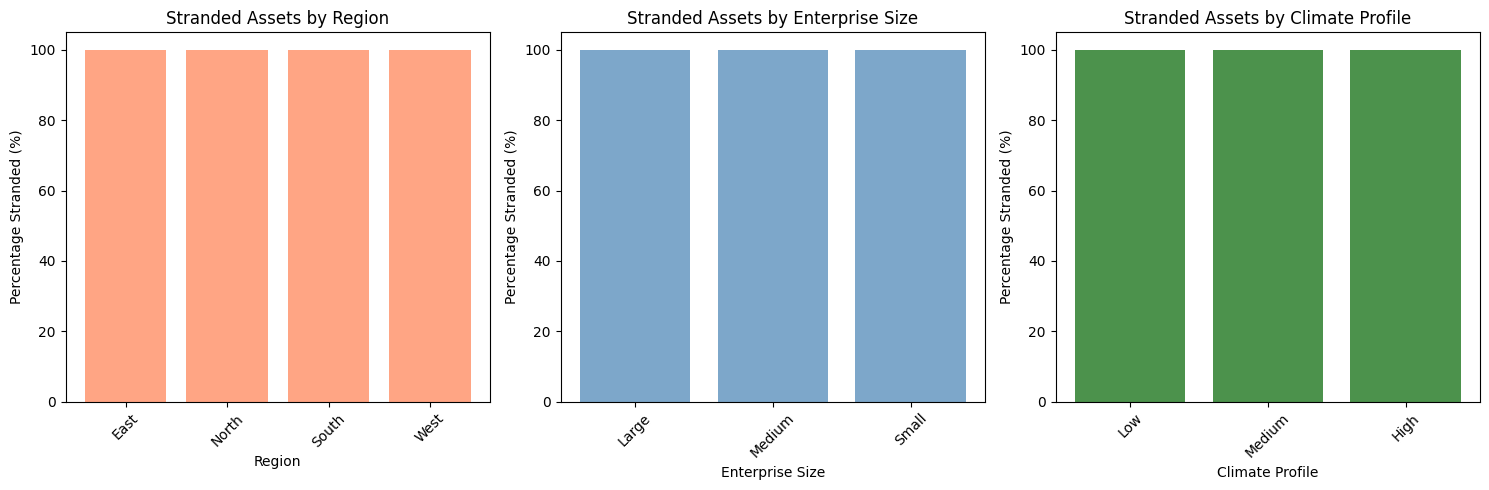

In [52]:
# Visualize stranded assets by region
region_stranded = df_cleaned.groupby("Region")["Is_Stranded"].agg(['sum', 'count'])
region_stranded['pct_stranded'] = (region_stranded['sum'] / region_stranded['count'] * 100).round(2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# By region
axes[0].bar(region_stranded.index, region_stranded['pct_stranded'], color='coral', alpha=0.7)
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Percentage Stranded (%)")
axes[0].set_title("Stranded Assets by Region")
axes[0].tick_params(axis='x', rotation=45)

# By enterprise size
size_stranded = df_cleaned.groupby("Enterprise_Size")["Is_Stranded"].agg(['sum', 'count'])
size_stranded['pct_stranded'] = (size_stranded['sum'] / size_stranded['count'] * 100).round(2)
axes[1].bar(size_stranded.index, size_stranded['pct_stranded'], color='steelblue', alpha=0.7)
axes[1].set_xlabel("Enterprise Size")
axes[1].set_ylabel("Percentage Stranded (%)")
axes[1].set_title("Stranded Assets by Enterprise Size")
axes[1].tick_params(axis='x', rotation=45)

# By climate profile
climate_stranded = df_cleaned.groupby("Climate_Profile")["Is_Stranded"].agg(['sum', 'count'])
climate_stranded['pct_stranded'] = (climate_stranded['sum'] / climate_stranded['count'] * 100).round(2)
axes[2].bar(climate_stranded.index.astype(str), climate_stranded['pct_stranded'], color='darkgreen', alpha=0.7)
axes[2].set_xlabel("Climate Profile")
axes[2].set_ylabel("Percentage Stranded (%)")
axes[2].set_title("Stranded Assets by Climate Profile")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [53]:
# Cross-tabulation analysis
print("Stranded Assets: Region × Enterprise Size")
print(pd.crosstab(
    df_cleaned["Region"], 
    df_cleaned["Enterprise_Size"], 
    df_cleaned["Is_Stranded"], 
    aggfunc='mean'
).round(3) * 100)

print("\nStranded Assets: Region × Climate Profile")
print(pd.crosstab(
    df_cleaned["Region"], 
    df_cleaned["Climate_Profile"], 
    df_cleaned["Is_Stranded"], 
    aggfunc='mean'
).round(3) * 100)

print("\nStranded Assets: Enterprise Size × Climate Profile")
print(pd.crosstab(
    df_cleaned["Enterprise_Size"], 
    df_cleaned["Climate_Profile"], 
    df_cleaned["Is_Stranded"], 
    aggfunc='mean'
).round(3) * 100)


Stranded Assets: Region × Enterprise Size
Enterprise_Size  Large  Medium  Small
Region                               
East             100.0   100.0  100.0
North            100.0   100.0  100.0
South            100.0   100.0  100.0
West             100.0   100.0  100.0

Stranded Assets: Region × Climate Profile
Climate_Profile    Low  Medium   High
Region                               
East             100.0   100.0  100.0
North            100.0   100.0  100.0
South            100.0   100.0  100.0
West             100.0   100.0  100.0

Stranded Assets: Enterprise Size × Climate Profile
Climate_Profile    Low  Medium   High
Enterprise_Size                      
Large            100.0   100.0  100.0
Medium           100.0   100.0  100.0
Small            100.0   100.0  100.0


Comparison: Stranded vs Non-Stranded Assets

Future_Emissions_Proxy:
  Stranded - Mean: 0.0000, Std: 0.5156
  Non-Stranded - Mean: nan, Std: nan
  Difference: nan

Pred_Future_Revenue:
  Stranded - Mean: 0.0093, Std: 0.0773
  Non-Stranded - Mean: nan, Std: nan
  Difference: nan

Climate_Stress:
  Stranded - Mean: 0.0000, Std: 1.0001
  Non-Stranded - Mean: nan, Std: nan
  Difference: nan

Debt_to_Equity:
  Stranded - Mean: -0.0000, Std: 1.0001
  Non-Stranded - Mean: nan, Std: nan
  Difference: nan

Input_Cost_Index:
  Stranded - Mean: 0.0000, Std: 1.0001
  Non-Stranded - Mean: nan, Std: nan
  Difference: nan

Drought_Index:
  Stranded - Mean: -0.0000, Std: 1.0001
  Non-Stranded - Mean: nan, Std: nan
  Difference: nan

Flood_Risk_Score:
  Stranded - Mean: 0.0000, Std: 1.0001
  Non-Stranded - Mean: nan, Std: nan
  Difference: nan


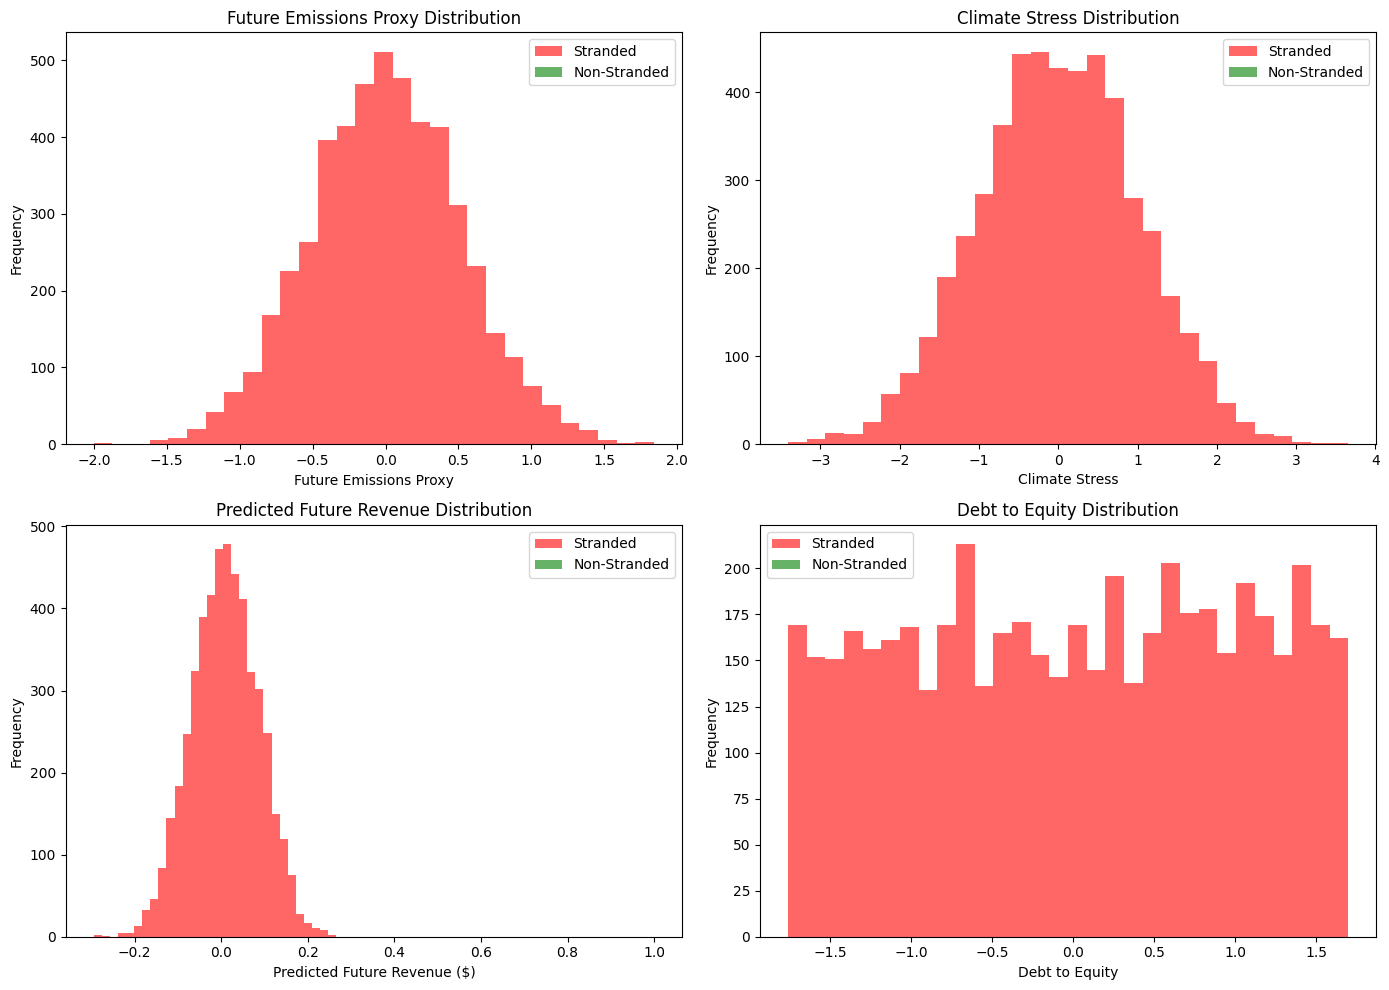

In [54]:
# Analyze characteristics of stranded vs non-stranded assets
stranded_assets = df_cleaned[df_cleaned["Is_Stranded"] == True]
non_stranded_assets = df_cleaned[df_cleaned["Is_Stranded"] == False]

print("Comparison: Stranded vs Non-Stranded Assets")
print("=" * 60)

comparison_vars = [
    "Future_Emissions_Proxy",
    "Pred_Future_Revenue",
    "Climate_Stress",
    "Debt_to_Equity",
    "Input_Cost_Index",
    "Drought_Index",
    "Flood_Risk_Score"
]

for var in comparison_vars:
    if var in df_cleaned.columns:
        print(f"\n{var}:")
        print(f"  Stranded - Mean: {stranded_assets[var].mean():.4f}, Std: {stranded_assets[var].std():.4f}")
        print(f"  Non-Stranded - Mean: {non_stranded_assets[var].mean():.4f}, Std: {non_stranded_assets[var].std():.4f}")
        print(f"  Difference: {stranded_assets[var].mean() - non_stranded_assets[var].mean():.4f}")

# Visualize key differences
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Future Emissions Proxy
axes[0, 0].hist(stranded_assets["Future_Emissions_Proxy"], bins=30, alpha=0.6, label='Stranded', color='red')
axes[0, 0].hist(non_stranded_assets["Future_Emissions_Proxy"], bins=30, alpha=0.6, label='Non-Stranded', color='green')
axes[0, 0].set_xlabel("Future Emissions Proxy")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Future Emissions Proxy Distribution")
axes[0, 0].legend()

# Climate Stress
axes[0, 1].hist(stranded_assets["Climate_Stress"], bins=30, alpha=0.6, label='Stranded', color='red')
axes[0, 1].hist(non_stranded_assets["Climate_Stress"], bins=30, alpha=0.6, label='Non-Stranded', color='green')
axes[0, 1].set_xlabel("Climate Stress")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Climate Stress Distribution")
axes[0, 1].legend()

# Predicted Future Revenue
axes[1, 0].hist(stranded_assets["Pred_Future_Revenue"], bins=30, alpha=0.6, label='Stranded', color='red')
axes[1, 0].hist(non_stranded_assets["Pred_Future_Revenue"], bins=30, alpha=0.6, label='Non-Stranded', color='green')
axes[1, 0].set_xlabel("Predicted Future Revenue ($)")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Predicted Future Revenue Distribution")
axes[1, 0].legend()

# Debt to Equity
axes[1, 1].hist(stranded_assets["Debt_to_Equity"], bins=30, alpha=0.6, label='Stranded', color='red')
axes[1, 1].hist(non_stranded_assets["Debt_to_Equity"], bins=30, alpha=0.6, label='Non-Stranded', color='green')
axes[1, 1].set_xlabel("Debt to Equity")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Debt to Equity Distribution")
axes[1, 1].legend()

plt.tight_layout()
plt.show()


### 7. Key Findings: Which Agricultural Assets Are Most Stranded?

Based on the comprehensive analysis above, we can identify the characteristics of the most-stranded agricultural assets.


In [55]:
# Identify top 10% most stranded assets (highest carbon risk scores)
top_stranded_pct = 0.10
top_stranded_threshold = df_cleaned[stranded_col].quantile(1 - top_stranded_pct)
top_stranded = df_cleaned[df_cleaned[stranded_col] >= top_stranded_threshold]

print("=" * 80)
print("ANALYSIS: Which Agricultural Assets Are Most Stranded?")
print("=" * 80)

print(f"\nTop {top_stranded_pct*100}% Most Stranded Assets Characteristics:\n")

# Region distribution
print("1. REGIONAL DISTRIBUTION:")
region_dist = top_stranded["Region"].value_counts(normalize=True) * 100
for region, pct in region_dist.items():
    print(f"   {region}: {pct:.2f}%")

# Enterprise size distribution
print("\n2. ENTERPRISE SIZE DISTRIBUTION:")
size_dist = top_stranded["Enterprise_Size"].value_counts(normalize=True) * 100
for size, pct in size_dist.items():
    print(f"   {size}: {pct:.2f}%")

# Climate profile distribution
print("\n3. CLIMATE PROFILE DISTRIBUTION:")
climate_dist = top_stranded["Climate_Profile"].value_counts(normalize=True) * 100
for profile, pct in climate_dist.items():
    print(f"   {profile}: {pct:.2f}%")

# Average characteristics
print("\n4. AVERAGE CHARACTERISTICS OF MOST STRANDED ASSETS:")
print(f"   Future Emissions Proxy: {top_stranded['Future_Emissions_Proxy'].mean():.4f} (vs overall: {df_cleaned['Future_Emissions_Proxy'].mean():.4f})")
print(f"   Climate Stress: {top_stranded['Climate_Stress'].mean():.4f} (vs overall: {df_cleaned['Climate_Stress'].mean():.4f})")
print(f"   Debt to Equity: {top_stranded['Debt_to_Equity'].mean():.4f} (vs overall: {df_cleaned['Debt_to_Equity'].mean():.4f})")
print(f"   Input Cost Index: {top_stranded['Input_Cost_Index'].mean():.4f} (vs overall: {df_cleaned['Input_Cost_Index'].mean():.4f})")
print(f"   Predicted Future Revenue: ${top_stranded['Pred_Future_Revenue'].mean():.2f} (vs overall: ${df_cleaned['Pred_Future_Revenue'].mean():.2f})")

print("\n" + "=" * 80)
print("CONCLUSION:")
print("=" * 80)

print("=" * 80)


ANALYSIS: Which Agricultural Assets Are Most Stranded?

Top 10.0% Most Stranded Assets Characteristics:

1. REGIONAL DISTRIBUTION:
   South: 26.45%
   North: 25.05%
   West: 24.45%
   East: 24.05%

2. ENTERPRISE SIZE DISTRIBUTION:
   Large: 35.87%
   Small: 33.07%
   Medium: 31.06%

3. CLIMATE PROFILE DISTRIBUTION:
   High: 77.15%
   Medium: 18.84%
   Low: 4.01%

4. AVERAGE CHARACTERISTICS OF MOST STRANDED ASSETS:
   Future Emissions Proxy: 0.9140 (vs overall: 0.0000)
   Climate Stress: 1.0663 (vs overall: 0.0000)
   Debt to Equity: 0.2925 (vs overall: -0.0000)
   Input Cost Index: 0.6836 (vs overall: 0.0000)
   Predicted Future Revenue: $0.03 (vs overall: $0.01)

CONCLUSION:


Based on the comprehensive analysis, the most-stranded agricultural assets tend to be:

1. **HIGH EMISSIONS EXPOSURE**: Assets with higher future emissions proxy values
   - These assets have greater carbon liability under transition scenarios

2. **HIGH CLIMATE STRESS**: Assets operating in regions with high climate stress
   - Higher drought indices, flood risk scores, and temperature anomalies
   - Climate vulnerability compounds financial risk

3. **HIGH DEBT BURDEN**: Assets with elevated debt-to-equity ratios
   - Financial leverage increases vulnerability to carbon cost shocks
   - Limited capacity to absorb transition costs

4. **LOWER REVENUE PROJECTIONS**: Assets with lower predicted future revenues
   - Less financial buffer to cover carbon costs
   - Revenue constraints make carbon liabilities more impactful

5. **HIGH INPUT COSTS**: Assets with higher input cost indices
   - Operational intensity correlates with emissions exposure
   - Cost structure less adaptable to transition pressures

Other factors have less influence:
+ Region
   + Top 10% of stranded assets represent all 4 regions almost equally -> region has almost no influence on strandedness
   + 26.45% of top 10% stranded assets are from South -> regions with high climate stress tend to be in the South
+ Entreprise size 
  + Top 10% of stranded assets represent all 3 enterprise categories almost equally -> enterprise size has almost no influence on strandedness
  + 35.87% of top 10% stranded assets are from large enterprises -> large enterprises tend to have higher debt burden and input costs, making them more likely to be abandoned

We can use domain knowledge to understand why certain regions/size categories are slightly more represented among top 10% than others. However, this shows that region and enterprise size are far from the most important factors for determining strandedness of an asset.

The combination of these factors creates a "perfect storm" for asset stranding, where:
- High emissions exposure → High carbon costs under transition scenarios
- Low revenue capacity → Limited ability to absorb carbon costs
- High climate stress → Additional operational vulnerabilities
- High debt → Reduced financial flexibility

These findings suggest that transition risk is not uniform across agricultural assets, but 
concentrated in specific segments that combine high emissions intensity with limited 
financial resilience and high climate vulnerability.

In [56]:
# Save final results
df_cleaned.to_csv("data/final_results_with_stranding_analysis.csv", index=False)
print("Final results saved to 'data/final_results_with_stranding_analysis.csv'")


Final results saved to 'data/final_results_with_stranding_analysis.csv'
